In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats
import numpy as np
from math import sqrt

In [53]:
cdatasub = pd.read_csv("london_flows.csv")
cdatasub

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554


In [54]:
cdatasubmat = pd.pivot_table(cdatasub, values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


In [55]:
cdatasub.head(10)

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167
5,Abbey Road,Crossharbour,1,599,1208,6686.475560
6,Abbey Road,Custom House,0,599,845,3824.855630
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909
8,Abbey Road,Cyprus,7,599,850,6532.099618
9,Abbey Road,Devons Road,1,599,611,3958.324171


In [56]:
cdatasub.replace(to_replace=0, value=0.0000000001, inplace=True)

In [57]:
#take the variables and produce logarithms of them
x_variables = ["jobs", "distance"]
log_x_vars = []
for x in x_variables:
    cdatasub[f"log_{x}"] = np.log(cdatasub[x])
    log_x_vars.append(f"log_{x}")

In [58]:
cdatasub

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance
0,Abbey Road,Bank and Monument,1.000000e-10,599.0,78549.0,8131.525097,11.271478,9.003504
1,Abbey Road,Beckton,1.000000e+00,599.0,442.0,8510.121774,6.091310,9.049012
2,Abbey Road,Blackwall,3.000000e+00,599.0,665.0,3775.448872,6.499787,8.236275
3,Abbey Road,Canary Wharf,1.000000e+00,599.0,58772.0,5086.514220,10.981421,8.534348
4,Abbey Road,Canning Town,3.700000e+01,599.0,15428.0,2228.923167,9.643939,7.709274
...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,1.270000e+02,7892.0,3342.0,13401.795549,8.114325,9.503144
61470,Woolwich Arsenal,West Ham,6.080000e+02,7892.0,5487.0,8701.454361,8.610137,9.071245
61471,Woolwich Arsenal,West India Quay,6.000000e+00,7892.0,400.0,9536.720451,5.991465,9.162905
61472,Woolwich Arsenal,West Silvertown,8.100000e+01,7892.0,893.0,5355.248554,6.794587,8.585832


In [59]:
cdatasub

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance
0,Abbey Road,Bank and Monument,1.000000e-10,599.0,78549.0,8131.525097,11.271478,9.003504
1,Abbey Road,Beckton,1.000000e+00,599.0,442.0,8510.121774,6.091310,9.049012
2,Abbey Road,Blackwall,3.000000e+00,599.0,665.0,3775.448872,6.499787,8.236275
3,Abbey Road,Canary Wharf,1.000000e+00,599.0,58772.0,5086.514220,10.981421,8.534348
4,Abbey Road,Canning Town,3.700000e+01,599.0,15428.0,2228.923167,9.643939,7.709274
...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,1.270000e+02,7892.0,3342.0,13401.795549,8.114325,9.503144
61470,Woolwich Arsenal,West Ham,6.080000e+02,7892.0,5487.0,8701.454361,8.610137,9.071245
61471,Woolwich Arsenal,West India Quay,6.000000e+00,7892.0,400.0,9536.720451,5.991465,9.162905
61472,Woolwich Arsenal,West Silvertown,8.100000e+01,7892.0,893.0,5355.248554,6.794587,8.585832


In [60]:
#create the formula
formula = 'flows ~ station_origin + log_jobs + log_distance-1'

In [61]:
#run the regression
ocons = smf.glm(formula=formula,
                data=cdatasub,
                family=sm.families.Poisson()).fit()

In [62]:
ocons.params

station_origin[Abbey Road]         -4.035699
station_origin[Acton Central]      -3.356010
station_origin[Acton Town]         -3.938627
station_origin[Aldgate]            -4.245238
station_origin[Aldgate East]       -4.164970
                                      ...   
station_origin[Woodgrange Park]    -3.025886
station_origin[Woodside Park]      -4.072173
station_origin[Woolwich Arsenal]   -1.450833
log_jobs                            0.831587
log_distance                       -0.038038
Length: 401, dtype: float64

In [63]:
K = 0
alpha_i = ocons.params[0:399]
gamma = ocons.params[399]
beta = -ocons.params[400]

print(beta)

0.038038280565515226


In [64]:
gamma

0.8315868512227388

In [65]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdatasub.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdatasub = cdatasub.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdatasub.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdatasub = cdatasub.merge(D_j, on = "station_destination", how = "left" )

In [66]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(ocons.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
cdatasub = cdatasub.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
cdatasub.drop(columns=["coef"], inplace=True)

C:\Users\ankur\AppData\Local\Temp\ipykernel_4540\400503639.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


In [67]:
cdatasub

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,1.000000e-10,599.0,78549.0,8131.525097,11.271478,9.003504,599.0,78549.0,-4.035699
1,Abbey Road,Beckton,1.000000e+00,599.0,442.0,8510.121774,6.091310,9.049012,599.0,442.0,-4.035699
2,Abbey Road,Blackwall,3.000000e+00,599.0,665.0,3775.448872,6.499787,8.236275,599.0,665.0,-4.035699
3,Abbey Road,Canary Wharf,1.000000e+00,599.0,58772.0,5086.514220,10.981421,8.534348,599.0,58772.0,-4.035699
4,Abbey Road,Canning Town,3.700000e+01,599.0,15428.0,2228.923167,9.643939,7.709274,599.0,15428.0,-4.035699
...,...,...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,1.270000e+02,7892.0,3342.0,13401.795549,8.114325,9.503144,7892.0,3342.0,-1.450833
61470,Woolwich Arsenal,West Ham,6.080000e+02,7892.0,5487.0,8701.454361,8.610137,9.071245,7892.0,5487.0,-1.450833
61471,Woolwich Arsenal,West India Quay,6.000000e+00,7892.0,400.0,9536.720451,5.991465,9.162905,7892.0,400.0,-1.450833
61472,Woolwich Arsenal,West Silvertown,8.100000e+01,7892.0,893.0,5355.248554,6.794587,8.585832,7892.0,893.0,-1.450833


In [68]:
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = row['jobs']/2
    else:
        val = row["jobs"]
    return val
        
cdatasub["half_scenrio"] = cdatasub.apply(new_job, axis =1)
cdatasub.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_jobs,log_distance,O_i,D_j,alpha_i,half_scenrio
0,Abbey Road,Bank and Monument,1.000000e-10,599.0,78549.0,8131.525097,11.271478,9.003504,599.0,78549.0,-4.035699,78549.0
1,Abbey Road,Beckton,1.000000e+00,599.0,442.0,8510.121774,6.091310,9.049012,599.0,442.0,-4.035699,442.0
2,Abbey Road,Blackwall,3.000000e+00,599.0,665.0,3775.448872,6.499787,8.236275,599.0,665.0,-4.035699,665.0
3,Abbey Road,Canary Wharf,1.000000e+00,599.0,58772.0,5086.514220,10.981421,8.534348,599.0,58772.0,-4.035699,29386.0
4,Abbey Road,Canning Town,3.700000e+01,599.0,15428.0,2228.923167,9.643939,7.709274,599.0,15428.0,-4.035699,15428.0
5,Abbey Road,Crossharbour,1.000000e+00,599.0,1208.0,6686.475560,7.096721,8.807842,599.0,1208.0,-4.035699,1208.0
6,Abbey Road,Custom House,1.000000e-10,599.0,845.0,3824.855630,6.739337,8.249276,599.0,845.0,-4.035699,845.0
7,Abbey Road,Cutty Sark,2.000000e+00,599.0,1748.0,8503.898909,7.466228,9.048280,599.0,1748.0,-4.035699,1748.0
8,Abbey Road,Cyprus,7.000000e+00,599.0,850.0,6532.099618,6.745236,8.784484,599.0,850.0,-4.035699,850.0
9,Abbey Road,Devons Road,1.000000e+00,599.0,611.0,3958.324171,6.415097,8.283576,599.0,611.0,-4.035699,611.0


In [69]:
cdatasub["flowestimate"] = np.exp(cdatasub["alpha_i"]+gamma*np.log(cdatasub["half_scenrio"]) - beta*cdatasub["log_distance"])

cdatasub["flowestimate"] = round(cdatasub["flowestimate"], 0)
#now we can convert the pivot table into a matrix
cdatasubmat3 = cdatasub.pivot_table(values ="flowestimate", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
cdatasubmat3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,548.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,1228.0
Acton Town,NaN,NaN,NaN,23.0,23.0,NaN,3.0,1.0,NaN,24.0,...,19.0,3.0,8.0,6.0,NaN,3.0,NaN,3.0,NaN,3688.0
Aldgate,NaN,NaN,6.0,NaN,19.0,NaN,NaN,1.0,NaN,19.0,...,14.0,NaN,6.0,5.0,NaN,2.0,NaN,2.0,NaN,2846.0
Aldgate East,NaN,NaN,6.0,20.0,NaN,NaN,3.0,1.0,NaN,20.0,...,15.0,2.0,6.0,5.0,NaN,3.0,NaN,3.0,NaN,3127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,11.0,31.0,32.0,NaN,NaN,NaN,NaN,32.0,...,25.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4795.0
Woodgrange Park,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.0
Woodside Park,NaN,NaN,7.0,20.0,21.0,NaN,3.0,NaN,NaN,21.0,...,17.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,3048.0


In [70]:
cdatasub.columns

Index(['station_origin', 'station_destination', 'flows', 'population', 'jobs',
       'distance', 'log_jobs', 'log_distance', 'O_i', 'D_j', 'alpha_i',
       'half_scenrio', 'flowestimate'],
      dtype='object')

In [71]:
extract = cdatasub[['station_origin', 'station_destination', 'flows', 'flowestimate']]
extract

,station_origin,station_destination,flows,flowestimate
0,Abbey Road,Bank and Monument,1.000000e-10,148.0
1,Abbey Road,Beckton,1.000000e+00,2.0
2,Abbey Road,Blackwall,3.000000e+00,3.0
3,Abbey Road,Canary Wharf,1.000000e+00,66.0
4,Abbey Road,Canning Town,3.700000e+01,40.0
...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,1.270000e+02,139.0
61470,Woolwich Arsenal,West Ham,6.080000e+02,214.0
61471,Woolwich Arsenal,West India Quay,6.000000e+00,24.0
61472,Woolwich Arsenal,West Silvertown,8.100000e+01,48.0


In [72]:
extract['flow_difference'] = abs(extract['flowestimate'] - extract['flows'])

C:\Users\ankur\AppData\Local\Temp\ipykernel_4540\1337789639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extract['flow_difference'] = abs(extract['flowestimate'] - extract['flows'])


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')

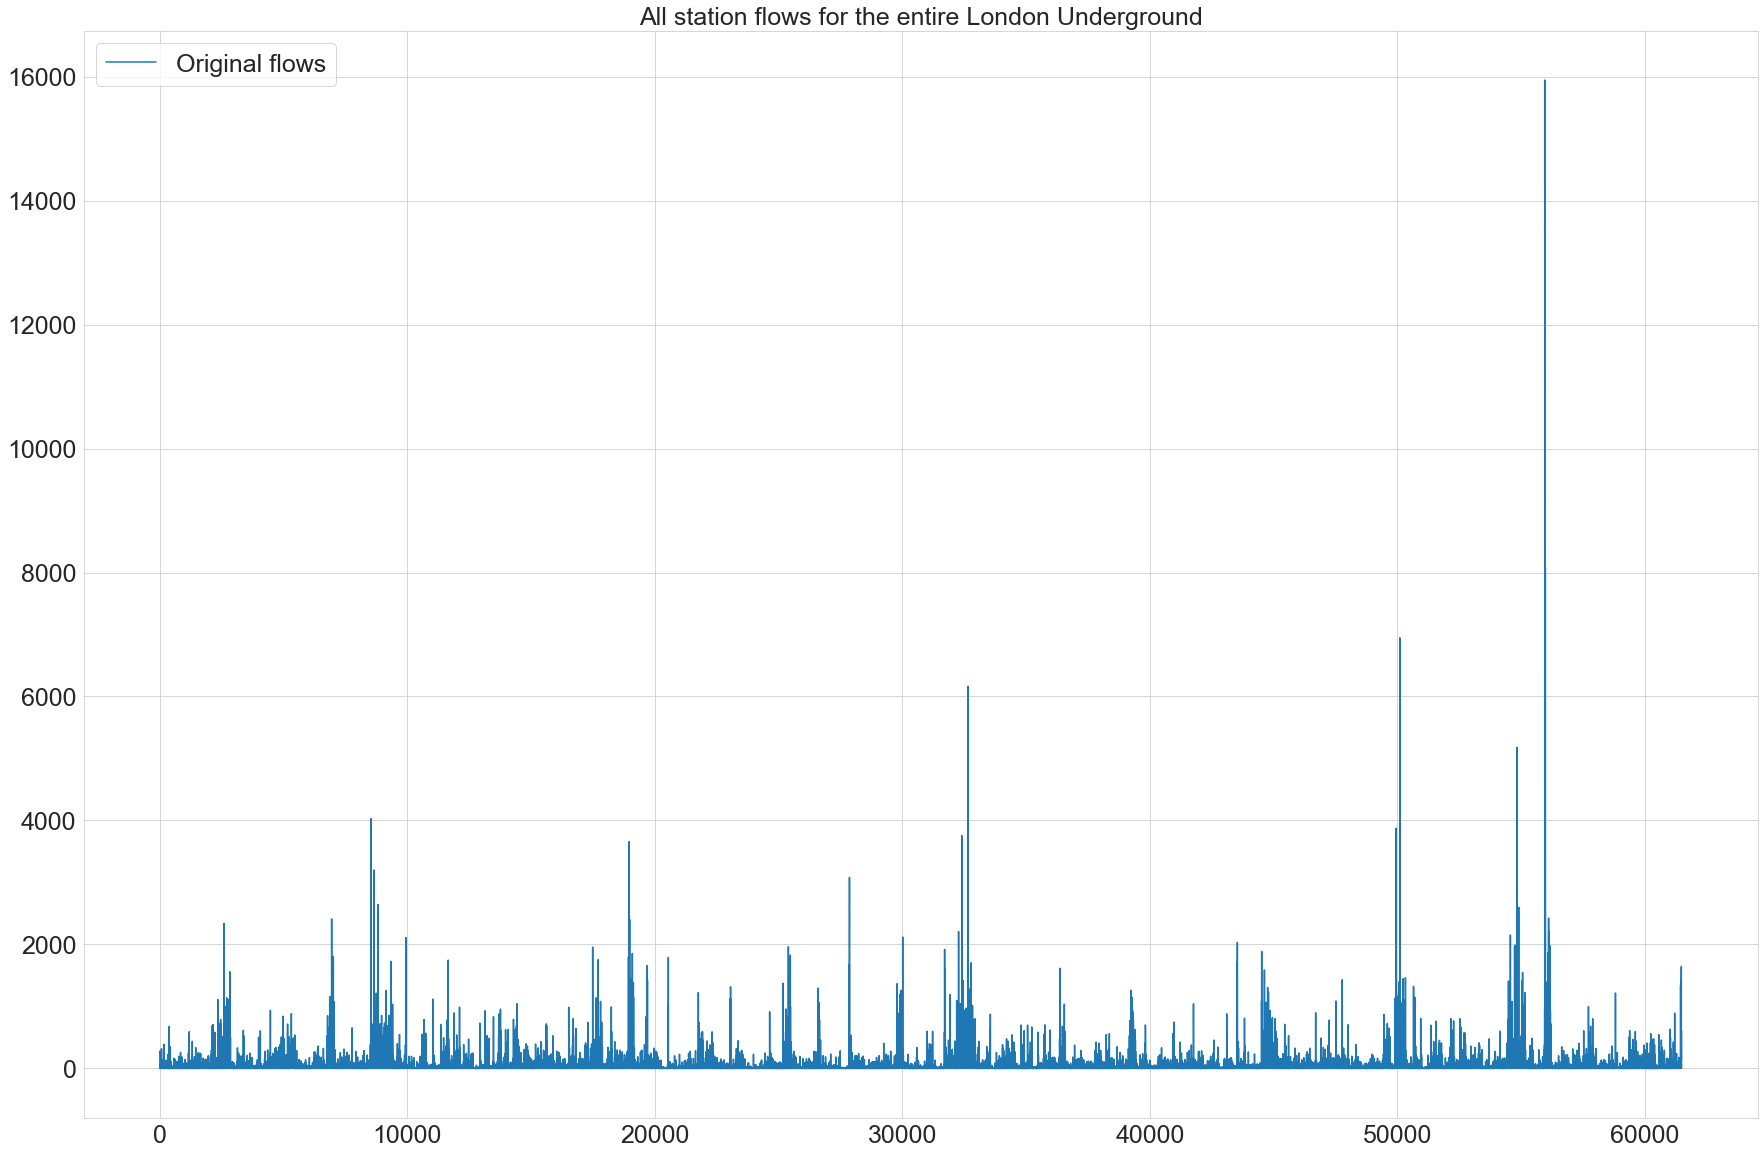

In [74]:
x = extract.index
plt.figure(figsize=(30, 20))
y = extract['flows']
plt.title('All station flows for the entire London Underground', fontsize=25)
plt.plot(x, y, label = 'Original flows')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(loc="upper left", prop={'size': 25})
plt.savefig('Only Flows.png', bbox_inches='tight')
plt.show()

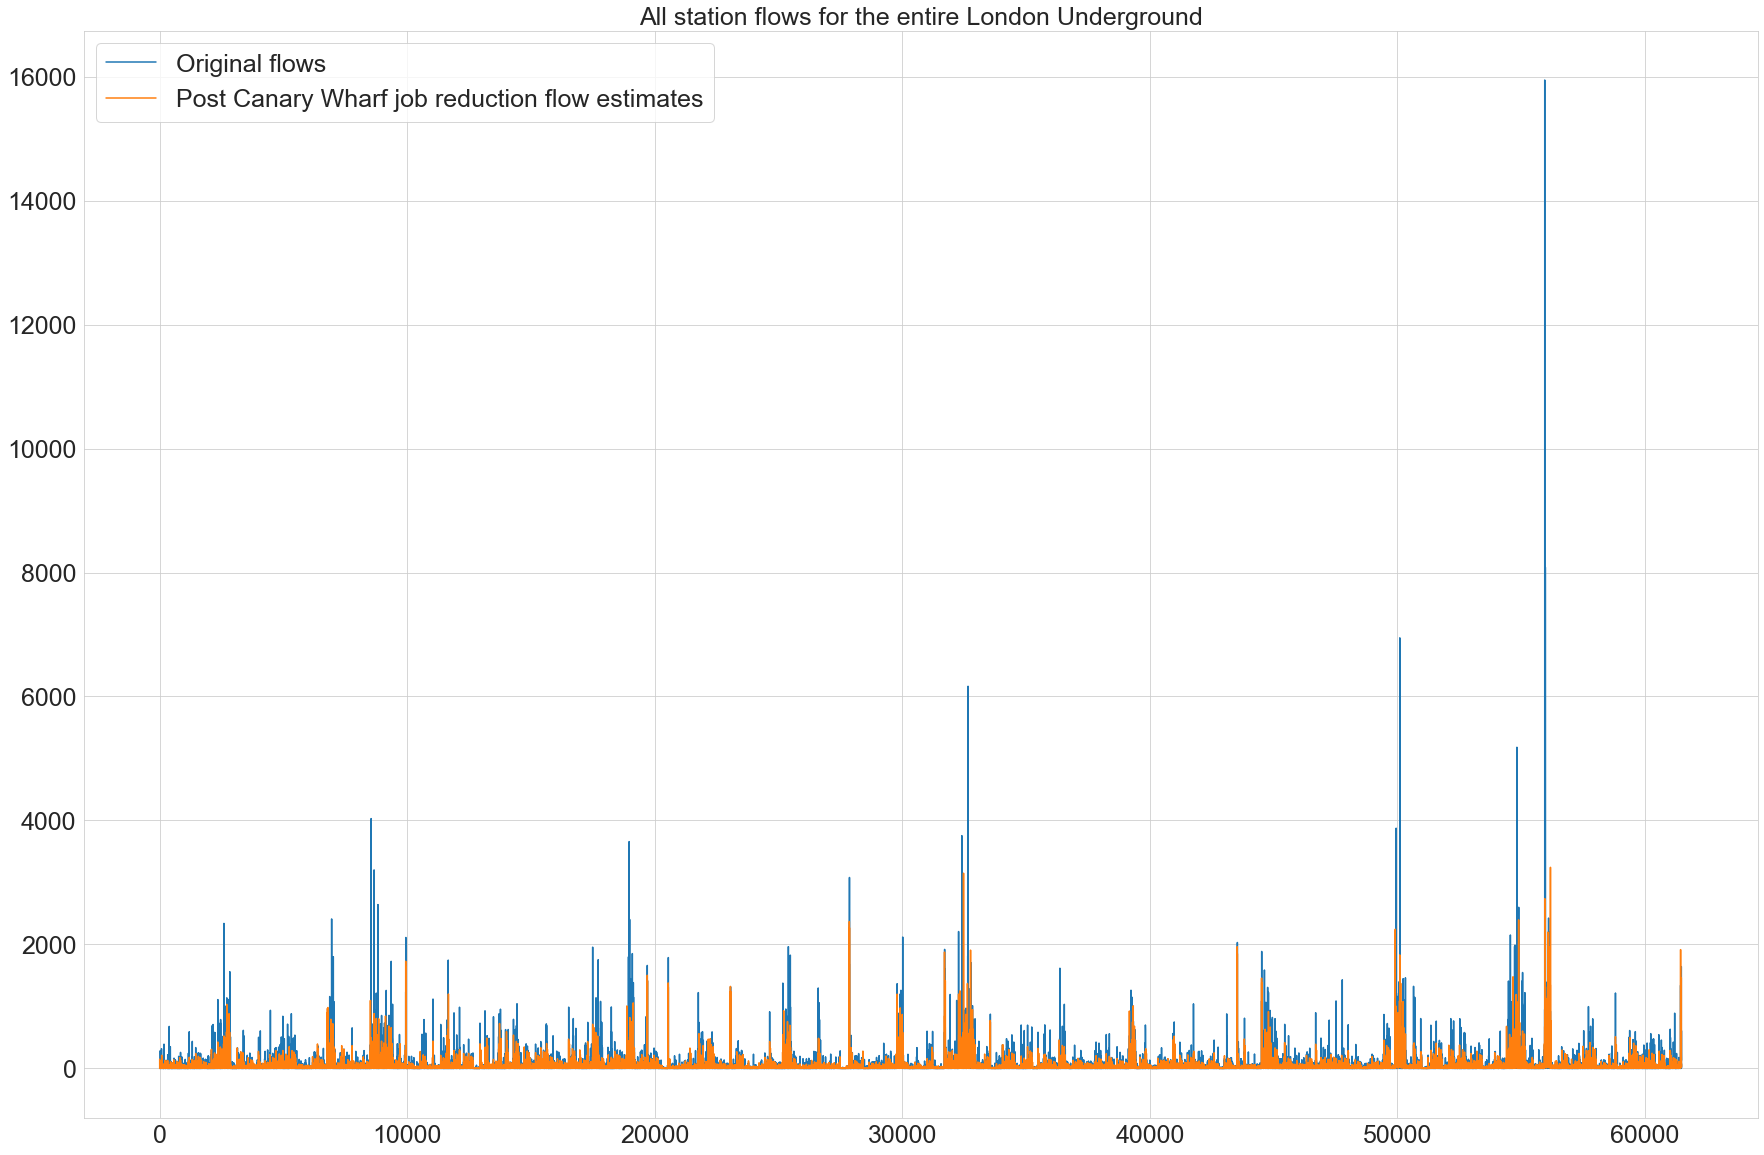

In [75]:
x = extract.index
plt.figure(figsize=(30, 20))
y1 = extract['flows']
y2 = extract['flowestimate']
plt.title('All station flows for the entire London Underground', fontsize=25)
plt.plot(x, y1, label = 'Original flows')
plt.plot(x, y2, label = 'Post Canary Wharf job reduction flow estimates')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(loc="upper left", prop={'size': 25})
plt.savefig('London Underground.png', bbox_inches='tight')
plt.show()

In [76]:
extract_only_canary_inflows = extract[extract['station_destination']=='Canary Wharf']
extract_only_canary_inflows.reset_index(inplace=True)
extract_only_canary_inflows

,index,station_origin,station_destination,flows,flowestimate,flow_difference
0,3,Abbey Road,Canary Wharf,1.000000e+00,66.0,65.0
1,126,Acton Town,Canary Wharf,5.700000e+01,69.0,12.0
2,348,Aldgate,Canary Wharf,1.000000e+00,53.0,52.0
3,595,Aldgate East,Canary Wharf,3.000000e+00,58.0,55.0
4,817,All Saints,Canary Wharf,6.700000e+01,81.0,14.0
...,...,...,...,...,...,...
300,60595,Wood Green,Canary Wharf,6.400000e+01,122.0,58.0
301,60838,Wood Lane,Canary Wharf,1.000000e-10,23.0,23.0
302,61062,Woodford,Canary Wharf,1.920000e+02,94.0,98.0
303,61294,Woodside Park,Canary Wharf,4.200000e+01,60.0,18.0


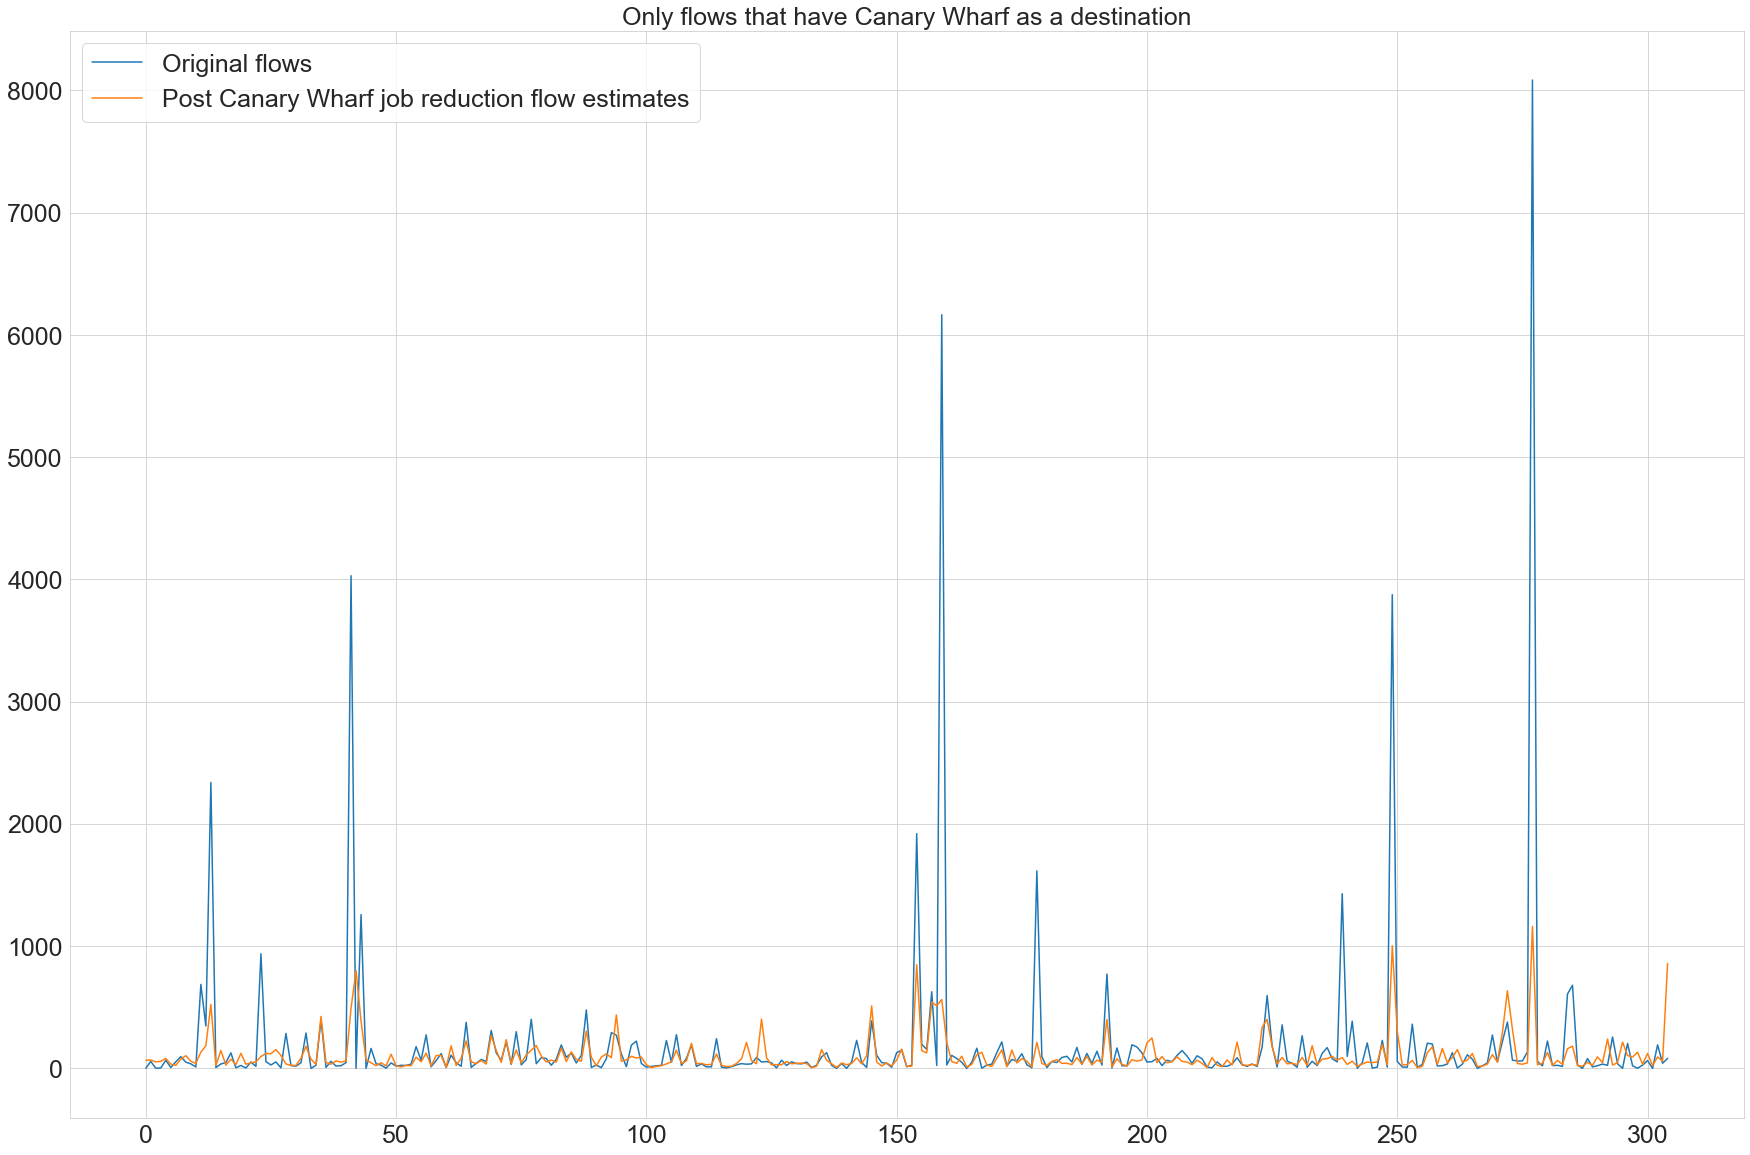

In [77]:
x = extract_only_canary_inflows.index
plt.figure(figsize=(30, 20))
y1 = extract_only_canary_inflows['flows']
y2 = extract_only_canary_inflows['flowestimate']
plt.title('Only flows that have Canary Wharf as a destination', fontsize=25)
plt.plot(x, y1, label = 'Original flows')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.plot(x, y2, label = 'Post Canary Wharf job reduction flow estimates')
plt.legend(loc="upper left", prop={'size': 25})
plt.savefig('CanaryWharf.png', bbox_inches='tight')
plt.show()

In [78]:
mean_flow = extract['flows'].mean()
mean_flow_canary_wharf_inflows = extract_only_canary_inflows['flows'].mean()

max_flow =  extract['flows'].max()

mean_estimated_flow = extract['flowestimate'].mean()
mean_estimated_flow_canary_wharf_inflows = extract_only_canary_inflows['flowestimate'].mean()

max_flow_difference = extract['flow_difference'].max()
max_flow_difference_canary_wharf_inflows = extract_only_canary_inflows['flow_difference'].max()

mean_flow_difference = extract['flow_difference'].mean()
mean_flow_difference_canary_wharf_inflows = extract_only_canary_inflows['flow_difference'].mean()

mean_flow_percentage_difference = 100 * ((mean_flow - mean_estimated_flow)/mean_flow)
mean_flow_percentage_difference_canary_wharf =  100 * ((mean_flow_canary_wharf_inflows - mean_estimated_flow_canary_wharf_inflows)/mean_flow_canary_wharf_inflows)

print('Mean flow ' + str(mean_flow))
print('Mean flow, canary wharf inflows ' + str(mean_flow_canary_wharf_inflows))

print('Mean estimated flow ' + str(mean_estimated_flow))
print('Mean estimated flow, canary wharf inflows ' + str(mean_estimated_flow_canary_wharf_inflows))

print('Max flow difference' + str(max_flow_difference))
print('Max flow difference, canary wharf inflows' + str(max_flow_difference_canary_wharf_inflows))

print('Mean flow difference' + str(mean_flow_difference))
print('Mean flow difference, canary wharf inflows' + str(mean_flow_difference_canary_wharf_inflows))

print('Percentage difference in flows '+str(mean_flow_percentage_difference))
print('Percentage difference in flows, canary wharf inflows '+str(mean_flow_percentage_difference_canary_wharf))

print('Max flow ' + str(max_flow))

Mean flow 25.0901356671347
Mean flow, canary wharf inflows 192.6950819672164
Mean estimated flow 24.677066727396948
Mean estimated flow, canary wharf inflows 106.3344262295082
Max flow difference13207.0
Max flow difference, canary wharf inflows6924.0
Mean flow difference23.291912027826886
Mean flow difference, canary wharf inflows150.67540983606227
Percentage difference in flows 1.6463400007789761
Percentage difference in flows, canary wharf inflows 44.817259919690585
Max flow 15946.0


## Cost function

In [79]:
cdatasub2 = pd.read_csv("london_flows.csv")
cdatasub3 = pd.read_csv("london_flows.csv")

In [80]:
cdatasub2.replace(to_replace=0, value=0.0000000001, inplace=True)
cdatasub3.replace(to_replace=0, value=0.0000000001, inplace=True)

In [81]:
#take the variables and produce logarithms of them
x_variables = ["jobs", "distance"]
log_x_vars = []
for x in x_variables:
    cdatasub2[f"log_{x}"] = np.log(cdatasub2[x])
    log_x_vars.append(f"log_{x}")

In [82]:
#take the variables and produce logarithms of them
x_variables = ["jobs", "distance"]
log_x_vars = []
for x in x_variables:
    cdatasub3[f"log_{x}"] = np.log(cdatasub3[x])
    log_x_vars.append(f"log_{x}")

In [83]:
cost_function = "flows ~ station_origin + log_jobs + distance-1" 
#run the regression
cost1 = smf.glm(formula=cost_function,
                data=cdatasub2,
                family=sm.families.Poisson()).fit()

In [84]:
K = 0
alpha_i = cost1.params[0:399]
gamma = cost1.params[399]
beta = -cost1.params[400]

print(gamma)
print(beta)

0.7509082223388838
0.00015081739033649016


In [85]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdatasub2.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdatasub2 = cdatasub2.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdatasub2.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdatasub2 = cdatasub2.merge(D_j, on = "station_destination", how = "left" )

In [86]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(cost1.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
cdatasub2 = cdatasub2.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
cdatasub2.drop(columns=["coef"], inplace=True)

C:\Users\ankur\AppData\Local\Temp\ipykernel_4540\949824455.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


In [87]:
cdatasub2["flowestimate"] = np.exp(cdatasub2["alpha_i"]+gamma*np.log(cdatasub2["jobs"]) - beta*cdatasub2["distance"])

In [88]:
extract1 = cdatasub2[['station_origin', 'station_destination', 'flows', 'flowestimate']]

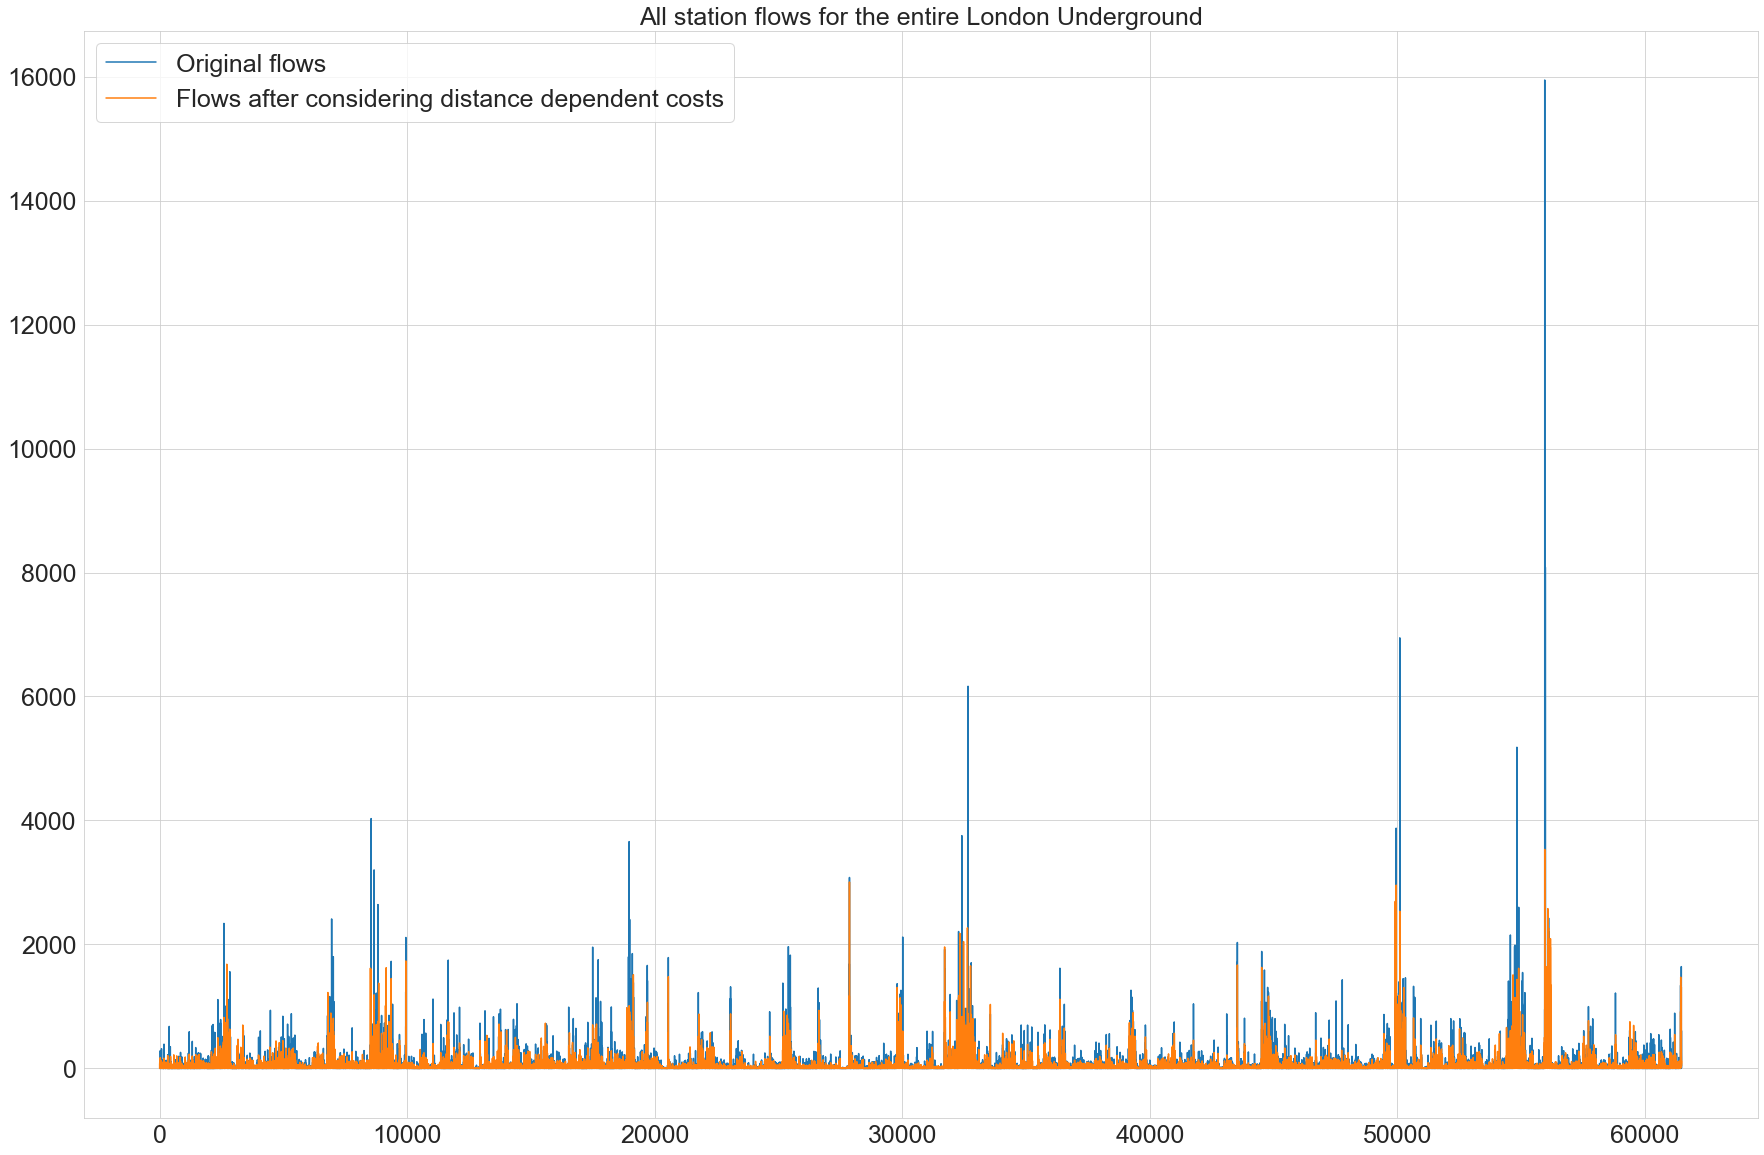

In [89]:
x = extract1.index
plt.figure(figsize=(30, 20))
y1 = extract1['flows']
y2 = extract1['flowestimate']
plt.title('All station flows for the entire London Underground', fontsize=25)
plt.plot(x, y1, label = 'Original flows')
plt.plot(x, y2, label = 'Flows after considering distance dependent costs')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(loc="upper left", prop={'size': 25})
plt.savefig('London Underground distance costs.png', bbox_inches='tight')
plt.show()

In [90]:
extract1['flow_difference'] = abs(extract1['flowestimate'] - extract1['flows'])

mean_flow = extract1['flows'].mean()

mean_estimated_flow = extract1['flowestimate'].mean()


max_flow_difference = extract1['flow_difference'].max()


mean_flow_difference = extract1['flow_difference'].mean()


mean_flow_percentage_difference = 100 * ((mean_flow - mean_estimated_flow)/mean_flow)


print('Mean flow ' + str(mean_flow))

print('Mean estimated flow ' + str(mean_estimated_flow))

print('Max flow difference' + str(max_flow_difference))

print('Mean flow difference' + str(mean_flow_difference))

print('Percentage difference in flows '+str(mean_flow_percentage_difference))

Mean flow 25.0901356671347
Mean estimated flow 25.090135667225862
Max flow difference12413.168855910044
Mean flow difference20.25236871401568
Percentage difference in flows -3.633405343337135e-10


C:\Users\ankur\AppData\Local\Temp\ipykernel_4540\2629398677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extract1['flow_difference'] = abs(extract1['flowestimate'] - extract1['flows'])


In [91]:
cdatasub3['square_distance'] = cdatasub3['distance']*cdatasub3['distance']

In [92]:
cost_function = "flows ~ station_origin + log_jobs + square_distance-1" 
#run the regression
cost2 = smf.glm(formula=cost_function,
                data=cdatasub3,
                family=sm.families.Poisson()).fit()

In [93]:
cost2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  flows   No. Observations:                61474
Model:                            GLM   Df Residuals:                    61074
Model Family:                 Poisson   Df Model:                          399
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -9.8877e+05
Date:                Tue, 03 May 2022   Deviance:                   1.8053e+06
Time:                        09:54:23   Pearson chi2:                 1.00e+07
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
station_origin[Abbey Road]                     -3.4361      0.041    -83.128      0.000      -3.517      -3.355
station_origin[Acton Central]                  -1.9473      0.029    -66.944      0.000      -2.004      -1.890
station_origin[Acton Town]                     -2.5572      0.017   -147.094      0.000      -2.591      -2.523
station_origin[Aldgate]                        -3.5397      0.020   -180.795      0.000      -3.578      -3.501
station_origin[Aldgate East]                   -3.4579      0.019   -184.318      0.000      -3.495      -3.421
station_origin[All Saints]                     -3.3471      0.037    -89.783      0.000      -3.420      -3.274
station_origin[Alperton]                       -2.6003      0.026   -101.806      0.000      -2.650      -2.550
station_origin[Amersham]                        0.6797      0.029     23.165      0.000       0.622       0.737
station_origin[Anerley]                        -1.9419      0.040    -48.756      0.000      -2.020      -1.864
station_origin[Angel]                          -3.2003      0.017   -193.199      0.000      -3.233      -3.168
station_origin[Archway]                        -2.5983      0.015   -177.705      0.000      -2.627      -2.570
station_origin[Arnos Grove]                    -2.4465      0.019   -127.607      0.000      -2.484      -2.409
station_origin[Arsenal]                        -3.6716      0.022   -164.180      0.000      -3.715      -3.628
station_origin[Baker Street]                   -2.6288      0.013   -201.703      0.000      -2.654      -2.603
station_origin[Balham]                         -1.8346      0.012   -154.257      0.000      -1.858      -1.811
station_origin[Bank and Monument]              -1.3038      0.008   -157.154      0.000      -1.320      -1.288
station_origin[Barbican]                       -4.4091      0.029   -151.802      0.000      -4.466      -4.352
station_origin[Barking]                        -1.4957      0.013   -117.983      0.000      -1.521      -1.471
station_origin[Barkingside]                    -2.3440      0.029    -82.242      0.000      -2.400      -2.288
station_origin[Barons Court]                   -2.9566      0.017   -175.991      0.000      -2.990      -2.924
station_origin[Battersea Park]                -23.9311   1500.930     -0.016      0.987   -2965.700    2917.837
station_origin[Bayswater]                      -3.9845      0.026   -153.627      0.000      -4.035      -3.934
station_origin[Beckton]                        -2.4429      0.030    -82.106      0.000      -2.501      -2.385
station_origin[Beckton Park]                   -3.9568      0.059    -67.346      0.000      -4.072      -3.842
station_origin[Becontree]                      -2.2065     

In [94]:
K = 0
alpha_i = cost2.params[0:399]
gamma = cost2.params[399]
beta = -cost2.params[400]

print(gamma)
print(beta)

0.7562698834819185
5.349772571914222e-09


In [95]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(cdatasub3.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
cdatasub3 = cdatasub3.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(cdatasub2.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
cdatasub3 = cdatasub3.merge(D_j, on = "station_destination", how = "left" )

In [96]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(cost2.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
cdatasub3 = cdatasub3.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
cdatasub3.drop(columns=["coef"], inplace=True)

C:\Users\ankur\AppData\Local\Temp\ipykernel_4540\3299898879.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


In [97]:
cdatasub3["flowestimate"] = np.exp(cdatasub3["alpha_i"]+gamma*np.log(cdatasub3["jobs"]) - beta*cdatasub3["square_distance"])
extract2 = cdatasub3[['station_origin', 'station_destination', 'flows', 'flowestimate']]

In [98]:
cdatasub3.columns

Index(['station_origin', 'station_destination', 'flows', 'population', 'jobs',
       'distance', 'log_jobs', 'log_distance', 'square_distance', 'O_i', 'D_j',
       'alpha_i', 'flowestimate'],
      dtype='object')

In [99]:
extract2 = cdatasub3[['station_origin', 'station_destination', 'flows', 'flowestimate']]

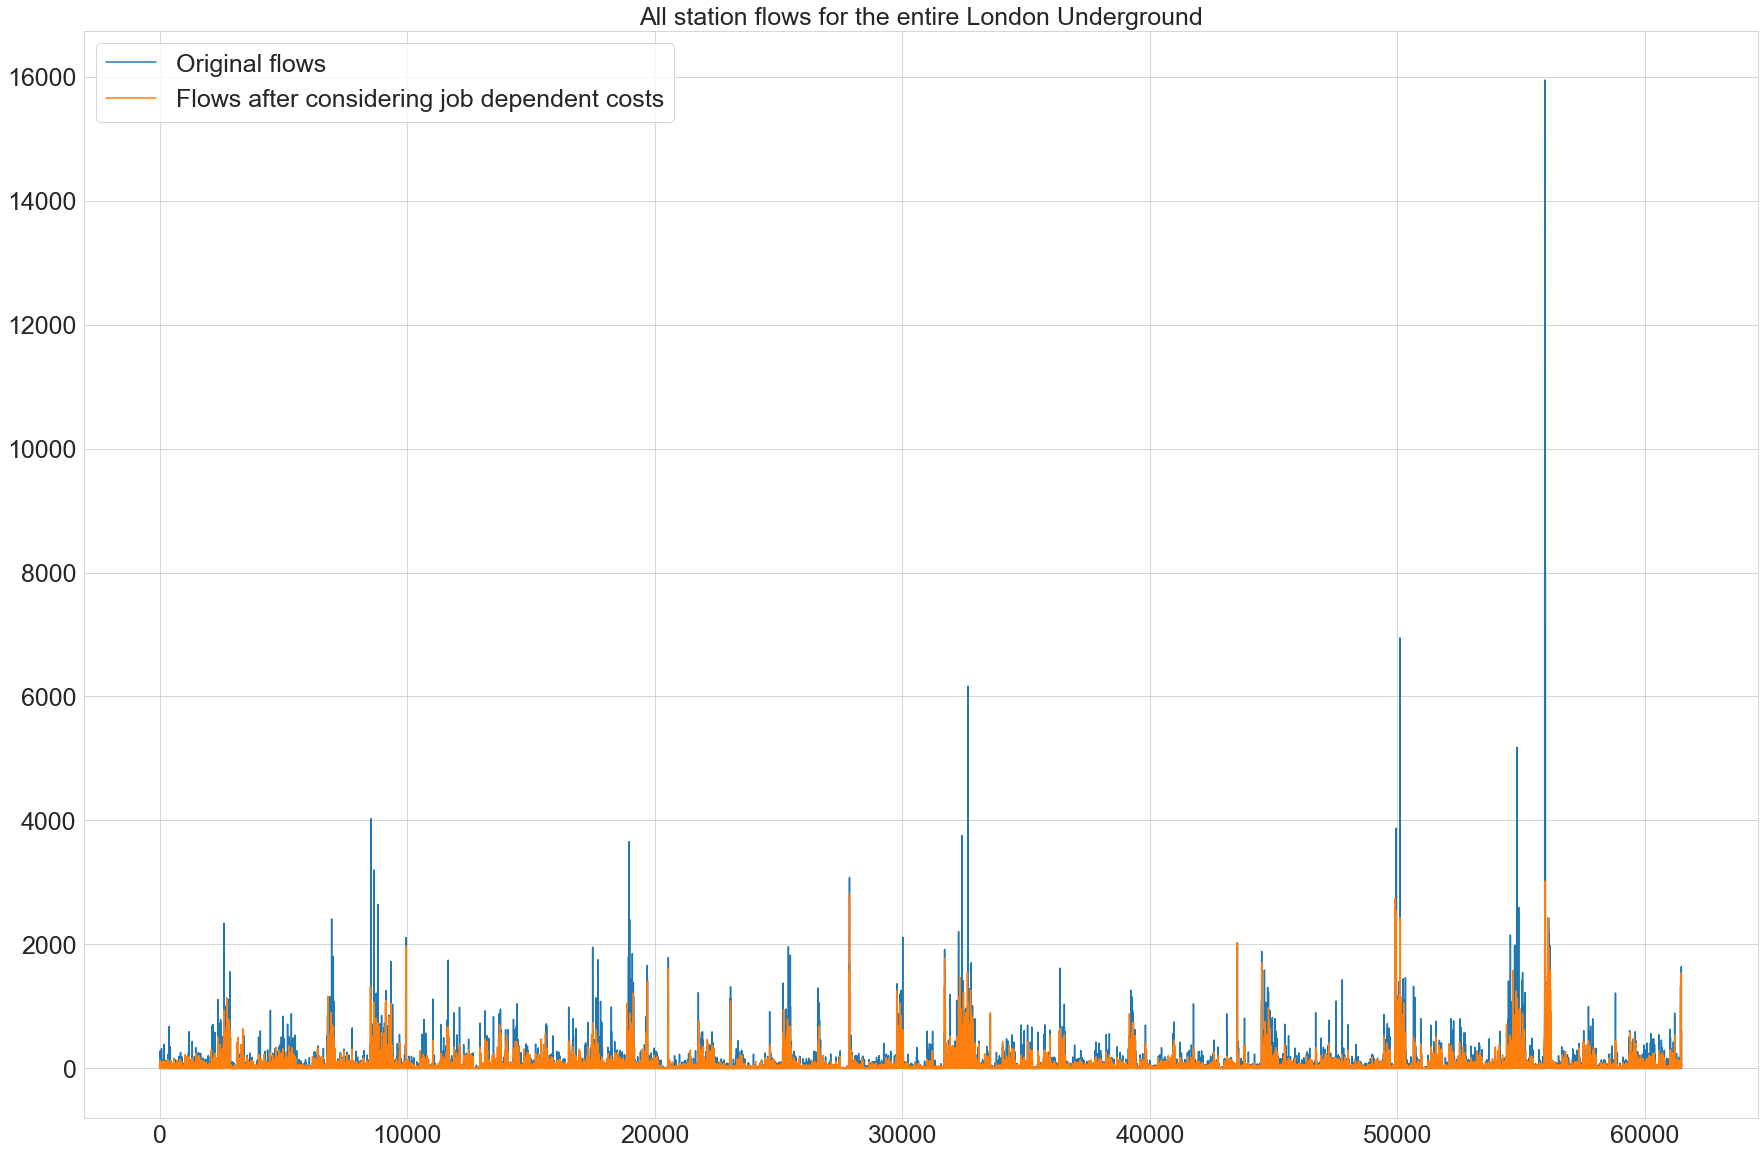

In [100]:
x = extract2.index
plt.figure(figsize=(30, 20))
y1 = extract2['flows']
y2 = extract2['flowestimate']
plt.title('All station flows for the entire London Underground', fontsize=25)
plt.plot(x, y1, label = 'Original flows')
plt.plot(x, y2, label = 'Flows after considering job dependent costs')

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.legend(loc="upper left", prop={'size': 25})
plt.savefig('London Underground job costs.png', bbox_inches='tight')
plt.show()

In [101]:
extract2['flow_difference'] = abs(extract2['flowestimate'] - extract2['flows'])

mean_flow = extract2['flows'].mean()

mean_estimated_flow = extract2['flowestimate'].mean()


max_flow_difference = extract2['flow_difference'].max()


mean_flow_difference = extract2['flow_difference'].mean()


mean_flow_percentage_difference = 100 * ((mean_flow - mean_estimated_flow)/mean_flow)


print('Mean flow ' + str(mean_flow))

print('Mean estimated flow ' + str(mean_estimated_flow))

print('Max flow difference' + str(max_flow_difference))

print('Mean flow difference' + str(mean_flow_difference))

print('Percentage difference in flows '+str(mean_flow_percentage_difference))

Mean flow 25.0901356671347
Mean estimated flow 25.090134346513505
Max flow difference12926.94202169893
Mean flow difference20.855331563888
Percentage difference in flows 5.263507587774765e-06


C:\Users\ankur\AppData\Local\Temp\ipykernel_4540\792722899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extract2['flow_difference'] = abs(extract2['flowestimate'] - extract2['flows'])


In [102]:
mean_flow_a = extract['flowestimate'].mean()
mean_flow_b1 = extract1['flowestimate'].mean()
mean_flow_b2 = extract2['flowestimate'].mean()

max_flow_a = extract['flowestimate'].max()
max_flow_b1 = extract1['flowestimate'].max()
max_flow_b2 = extract2['flowestimate'].max()

flow_differences_a = abs(extract['flows'] - extract['flowestimate'])
flow_differences_b1 = abs(extract1['flows'] - extract1['flowestimate'])
flow_differences_b2 = abs(extract2['flows'] - extract2['flowestimate'])

mean_flow_differences_a = flow_differences_a.mean()
mean_flow_differences_b1 = flow_differences_b1.mean()
mean_flow_differences_b2 = flow_differences_b2.mean()

max_flow_differences_a = flow_differences_a.max()
max_flow_differences_b1 = flow_differences_b1.max()
max_flow_differences_b2 = flow_differences_b2.max()

print(mean_flow_a)
print(mean_flow_b1)
print(mean_flow_b2)

print(max_flow_a)
print(max_flow_b1)
print(max_flow_b2)


print(mean_flow_differences_a)
print(mean_flow_differences_b1)
print(mean_flow_differences_b2)

print(max_flow_differences_a)
print(max_flow_differences_b1)
print(max_flow_differences_b2)

24.677066727396948
25.090135667225862
25.090134346513505
3244.0
3532.8311440899565
3019.057978301071
23.291912027826886
20.25236871401568
20.855331563888
13207.0
12413.168855910044
12926.94202169893
